In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bitcoin_price_dataset_2015_2023.csv')
data.head()

,Date,Open Price (USD),High Price (USD),Low Price (USD),Closing Price (USD),Adjusted Closing Price (USD),Trading Volume
0,2023-09-06,25772.601563,25845.994141,25708.595703,25721.945313,25721.945313,10252755968
1,2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2,2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
3,2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
4,2023-09-02,25800.910156,25970.285156,25753.093750,25868.798828,25868.798828,10100387473


## EDA 

In [3]:
data.dtypes

Date                             object
Open Price (USD)                float64
High Price (USD)                float64
Low Price (USD)                 float64
Closing Price (USD)             float64
Adjusted Closing Price (USD)    float64
Trading Volume                    int64
dtype: object

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open Price (USD),3171.0,1.433217e+04,1.606503e+04,1.768970e+02,1.068205e+03,8.221580e+03,2.228737e+04,6.754973e+04
High Price (USD),3171.0,1.467438e+04,1.646043e+04,2.117310e+02,1.110830e+03,8.371150e+03,2.266147e+04,6.878962e+04
Low Price (USD),3171.0,1.395629e+04,1.561228e+04,1.715100e+02,1.043930e+03,8.005310e+03,2.162542e+04,6.638206e+04
Closing Price (USD),3171.0,1.433880e+04,1.606118e+04,1.781030e+02,1.075885e+03,8.222078e+03,2.235801e+04,6.756683e+04
Adjusted Closing Price (USD),3171.0,1.433880e+04,1.606118e+04,1.781030e+02,1.075885e+03,8.222078e+03,2.235801e+04,6.756683e+04
Trading Volume,3171.0,1.706397e+10,1.944117e+10,7.860650e+06,2.564590e+08,1.217532e+10,2.787545e+10,3.509679e+11


## Convert Date

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Open Price (USD),High Price (USD),Low Price (USD),Closing Price (USD),Adjusted Closing Price (USD),Trading Volume
0,2023-09-06,25772.601563,25845.994141,25708.595703,25721.945313,25721.945313,10252755968
1,2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2,2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
3,2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
4,2023-09-02,25800.910156,25970.285156,25753.093750,25868.798828,25868.798828,10100387473
...,...,...,...,...,...,...,...
3166,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
3167,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
3168,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3169,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650


## VISUALIZATION

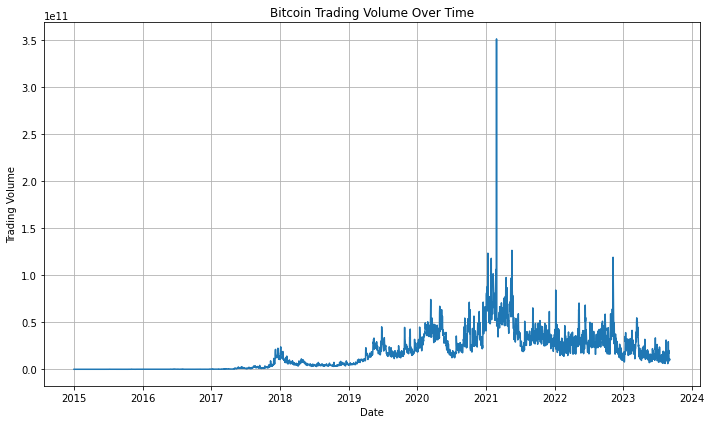

In [6]:
plt.figure(figsize=(10,6))

plt.plot(data['Date'], data['Trading Volume'])
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')

plt.grid(True)
plt.tight_layout()

plt.show()

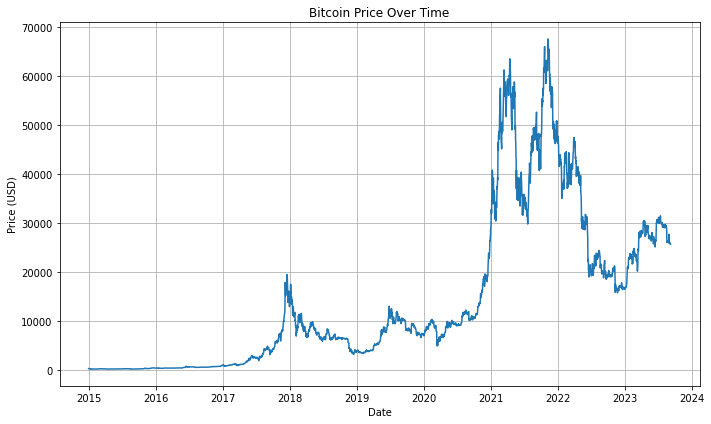

In [7]:
plt.figure(figsize=(10,6))

plt.plot(data['Date'], data['Closing Price (USD)'], linestyle='-')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.grid(True)
plt.tight_layout()

plt.show()

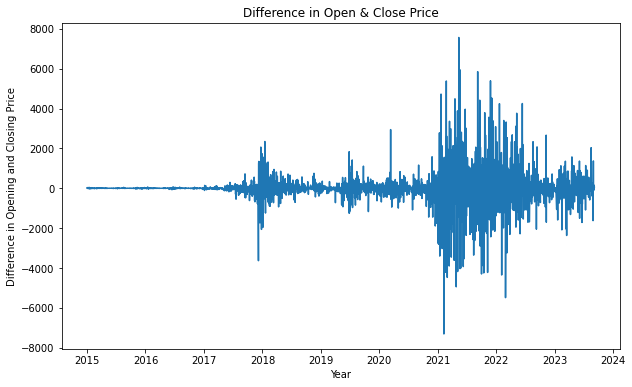

In [8]:
diff= data['Open Price (USD)']-data['Closing Price (USD)']

plt.figure(figsize=(10,6))
sns.lineplot(x=data['Date'], y=diff.values)

plt.title('Difference in Open & Close Price')
plt.xlabel('Year')
plt.ylabel('Difference in Opening and Closing Price')
plt.show()

## AVERAGE BITCOIN PER-YEAR

In [9]:
data.set_index('Date', inplace=True)
data

,Open Price (USD),High Price (USD),Low Price (USD),Closing Price (USD),Adjusted Closing Price (USD),Trading Volume
Date,,,,,,
2023-09-06,25772.601563,25845.994141,25708.595703,25721.945313,25721.945313,10252755968
2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
2023-09-02,25800.910156,25970.285156,25753.093750,25868.798828,25868.798828,10100387473
...,...,...,...,...,...,...
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400


In [10]:
avg_price = data['Open Price (USD)'].resample('Y').mean()
avg_price

Date
2015-12-31      272.149011
2016-12-31      567.141429
2017-12-31     3970.644848
2018-12-31     7601.018680
2019-12-31     7385.218456
2020-12-31    11056.787201
2021-12-31    47402.115663
2022-12-31    28278.690293
2023-12-31    26308.720805
Freq: A-DEC, Name: Open Price (USD), dtype: float64

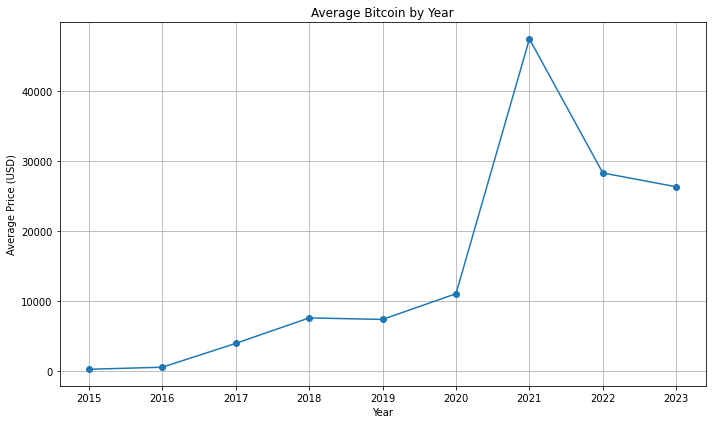

In [11]:
plt.figure(figsize=(10,6))
plt.plot(avg_price.index.year, avg_price.values, marker='o')


plt.title('Average Bitcoin by Year')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')

plt.grid(True)
plt.tight_layout()

plt.show()

## Train Test Split

In [12]:
# Create X and y for train test split

X = data.drop('Closing Price (USD)', axis=1)
y = data['Closing Price (USD)']

In [13]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

(X_train.shape), (y_train.shape)

((2536, 5), (2536,))

R-Squared (Random Forest): 0.9999853838938855


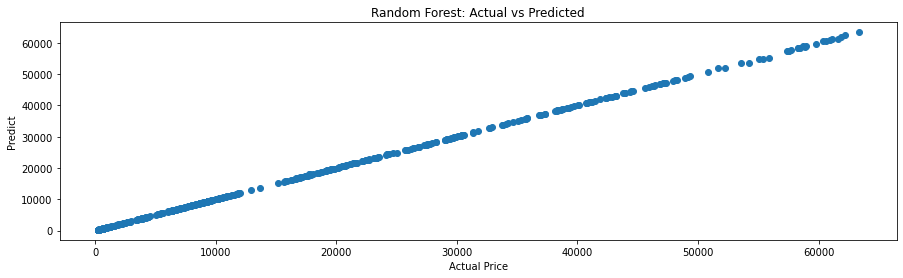

In [16]:
# Model predict with Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

btc_model = RandomForestRegressor(n_estimators=100, random_state=42)
btc_model.fit(X_train, y_train)

btc_pred = btc_model.predict(X_test)
score = r2_score(y_test, btc_pred)

plt.figure(figsize=(15,4))
plt.scatter(y_test, btc_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predict')
plt.title('Random Forest: Actual vs Predicted')

print(f'R-Squared (Random Forest): {score}')

plt.show()

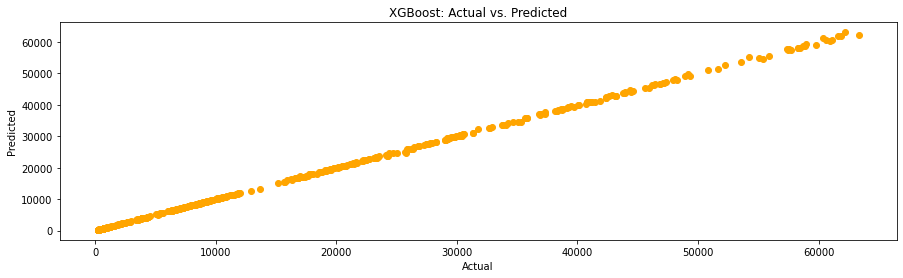

R-squared (XGBoost): 0.9999007948900527


In [15]:
# Model predict with XgBoost

from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
r_squared_xgb = r2_score(y_test, y_pred_xgb)

plt.figure(figsize=(15, 4))
plt.scatter(y_test, y_pred_xgb, color='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs. Predicted')
plt.show()

print(f'R-squared (XGBoost): {r_squared_xgb}')

**RESULT**

The performance of the models was evaluated using the R-square metric. Which measures the proportion of the variance in the dependent variable that is predictable from the independent variables.


1. Random Forest
    - R-squared: 0.999985
    - The Random Forest model achieved a R-squared value of approximately 0.999985, indicating that it explains about 99.9985% of the variance in Bitcoin Closing Price.

2. XgBoost
    - R-squared: 0.999900
    - The XgBoost model achieved a R-squared value of approximately 0.999900, indicating that it explains about 99.9900% of the variance in Bitcoin Closing Price.

Based on the results, the Random Forest model showed sightly higher R-square values. It may be better at capturing the underlying relationships in the data.

In conclusion, both Random Forest and XGBoost models can be considered as viable options for predicting Bitcoin closing price.